In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from warnings import simplefilter

## 1. Read the dataset to the python environment.

In [2]:
data = pd.read_excel('G:\DSA\Activity\Case Study 7\iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Do necessary pre-processing steps.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
ind= data[data.isna().any(axis=1)].index  # saving the index of the rows that contain missing values
data[data.isna().any(axis=1)]   

,SL,SW,PL,PW,Classification
2,NaN,3.2,1.3,0.2,Iris-setosa
10,5.4,NaN,1.5,0.2,Iris-setosa
21,NaN,3.7,1.5,0.4,Iris-setosa
27,5.2,NaN,1.5,0.2,Iris-setosa
28,5.2,3.4,NaN,0.2,Iris-setosa
39,NaN,3.4,1.5,0.2,Iris-setosa
42,4.4,3.2,NaN,0.2,Iris-setosa
43,5.0,NaN,1.6,0.6,Iris-setosa
51,NaN,3.2,4.5,1.5,Iris-versicolor
56,6.3,3.3,NaN,1.6,Iris-versicolor


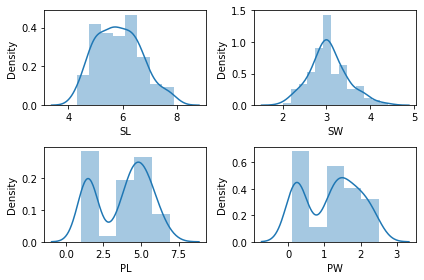

In [7]:
simplefilter('ignore')
plt.subplot(2,2,1)
sns.distplot(data.SL)
plt.subplot(2,2,2)
sns.distplot(data.SW)
plt.subplot(2,2,3)
sns.distplot(data.PL)
plt.subplot(2,2,4)
sns.distplot(data.PW)
plt.tight_layout()

In [8]:
# All the observations are nearly normally distributed. 
#So we shall use the means to fill in the missing values. 
#Categorywise means are used to replace the missing values

def treat_missing(cols):
    val,cl=cols[0],cols[1]
    if pd.isnull(val):
        val=data[data['Classification']==cl][cols.index[0]].mean()
    return val


In [9]:
data['SL'] = data[['SL','Classification']].apply(treat_missing,axis=1)
data['SW'] = data[['SW','Classification']].apply(treat_missing,axis=1)
data['PL'] = data[['PL','Classification']].apply(treat_missing,axis=1)

In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [11]:
data['Classification'].value_counts(normalize = True)

Iris-virginica     0.333333
Iris-versicolor    0.333333
Iris-setosa        0.333333
Name: Classification, dtype: float64

In [12]:
encod = LabelEncoder()
data['Classification'] = encod.fit_transform(data['Classification'])

Text(0.5, 1.0, 'Petal Dimensions')

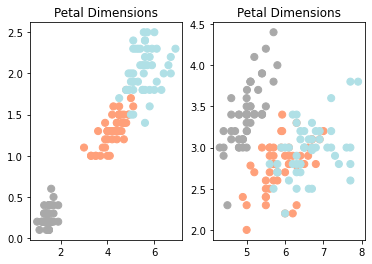

In [13]:
colour_theme = np.array(['darkgrey','lightsalmon','powderblue'])
plt.subplot(1,2,1)

plt.scatter(x = data.PL,y = data.PW,c = colour_theme[data.Classification], s=50)
plt.title('Petal Dimensions')

plt.subplot(1,2,2)

plt.scatter(x = data.SL,y = data.SW,c = colour_theme[data.Classification], s=50)
plt.title('Petal Dimensions')

In [14]:
data.groupby('Classification').mean()

,SL,SW,PL,PW
Classification,,,,
0,5.008511,3.408511,1.468750,0.244
1,5.925000,2.781250,4.252083,1.326
2,6.616667,2.967347,5.547917,2.026


In [15]:
data.loc[list(ind),:]   # check all the missing values has been replaced correctly

,SL,SW,PL,PW,Classification
2,5.008511,3.200000,1.300000,0.2,0
10,5.400000,3.408511,1.500000,0.2,0
21,5.008511,3.700000,1.500000,0.4,0
27,5.200000,3.408511,1.500000,0.2,0
28,5.200000,3.400000,1.468750,0.2,0
39,5.008511,3.400000,1.500000,0.2,0
42,4.400000,3.200000,1.468750,0.2,0
43,5.000000,3.408511,1.600000,0.6,0
51,5.925000,3.200000,4.500000,1.5,1
56,6.300000,3.300000,4.252083,1.6,1


In [16]:
# Scale the data using standard scaler and divide into features and labels
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(data[['SL','SW','PL','PW']])
y = data['Classification'].values.reshape(-1,1)

In [17]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 30, test_size = 0.2)
print(X_train[0:5],'\n',y_train[0:5])

[[ 1.28137771  0.11215058  0.9376374   1.1850097 ]
 [-0.42722208 -1.53605589 -0.03208645 -0.26119297]
 [ 1.15933487 -0.12330749  0.99467998  1.1850097 ]
 [ 0.30503497 -0.12330749  0.6524245   0.79059079]
 [ 2.25772044 -1.06513976  1.7932761   1.44795564]] 
 [[2]
 [1]
 [2]
 [2]
 [2]]


## 3. Find out which classification model gives the best result to predict iris species.

### Logistic Regression

In [18]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

In [19]:
print(metrics.classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.89      0.89         9
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [20]:
metrics.confusion_matrix(y_test,log_pred)

array([[12,  0,  0],
       [ 0,  8,  1],
       [ 0,  1,  8]], dtype=int64)

### K Nearest Neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier
def knn_models(k_value):
    knn_model = KNeighborsClassifier(n_neighbors = k_value, metric = 'minkowski')
    knn_model.fit(X_train, y_train)
    knn_pred = knn_model.predict(X_test)
    return knn_pred


In [22]:
accuracy_values = {}
k_values = np.arange(3,15)
for k in k_values:
    knn_prediction = knn_models(k)
    accuracy_values[k] = metrics.accuracy_score(y_test,knn_prediction)

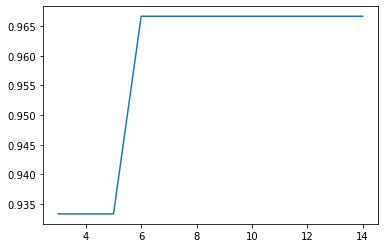

In [23]:
plt.plot(k_values,accuracy_values.values())

In [47]:
k = max(accuracy_values, key= lambda x: accuracy_values[x])
k

6

In [25]:
best_prediction = knn_models(k)
print(metrics.classification_report(y_test,best_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      1.00      0.95         9
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [26]:
print(metrics.confusion_matrix(y_test,best_prediction))

[[12  0  0]
 [ 0  9  0]
 [ 0  1  8]]


### Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dectree_model = DecisionTreeClassifier()
dectree_model.fit(X_train, y_train)
dectree_pred = dectree_model.predict(X_test)

In [29]:
print(metrics.classification_report(y_test, dectree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.89      0.89         9
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [30]:
print(metrics.confusion_matrix(y_test, dectree_pred))

[[12  0  0]
 [ 0  8  1]
 [ 0  1  8]]


### Support Vector Machine Model

In [31]:
from sklearn.svm import SVC

In [32]:
#Linear Kernal SVM
svcl_model = SVC(kernel = 'linear', degree = 3)
svcl_model.fit(X_train,y_train)
svcl_pred = svcl_model.predict(X_test)

In [33]:
print(metrics.classification_report(y_test, svcl_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.89      0.89         9
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [34]:
#Polynomial Kernal SVM
svcp_model = SVC(kernel = 'poly', degree = 3)
svcp_model.fit(X_train,y_train)
svcp_pred = svcp_model.predict(X_test)

In [35]:
print(metrics.classification_report(y_test, svcp_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      1.00      0.95         9
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [36]:
#RBF Kernal SVM
svcr_model = SVC(kernel = 'rbf', degree = 3)
svcr_model.fit(X_train,y_train)
svcr_pred = svcr_model.predict(X_test)

In [37]:
print(metrics.classification_report(y_test, svcr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      1.00      0.95         9
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



### Random Forest Model

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

In [40]:
print(metrics.classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.89      0.89         9
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

In [43]:
print(metrics.classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.89      0.89         9
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### Extreme Gradient Boosting

In [44]:
from xgboost import XGBClassifier

In [45]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

[20:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [46]:
print(metrics.classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.89      0.89         9
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## Conclusion

A comparison of the performance various Supervised Learning algorithms for classification problems, like Logistic Regression, KNN, Decision Trees, SVM, Random Forests, Gradient Boosting, and Extreme Gradient Booting was carried out.

After comparing the accuracy of each of the model, it is found that KNN (with k==6) and SVM ( Polynomial and RBF Kernals) shows the highest accuracy (97%) compared to others.

Thus the KNN and SVM models can be inferred to be more reliable for this problem